# TMDb Data Analysis by Garett Hansen

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we'll be analyzing data from over 10,000 different movies, courtesy of the The Movie Database. This dataset will first be cleaned and then analyzed. Specifically, we're going to investigate these two questions:

##### 1. Is there a correlation between budget and revenue?
##### 2. Is there a correlation between runtime and voter score?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.shape

(10866, 21)

>This tells us that the entire data set is comprised of 10,866 rows and 21 columns. Because this is a fairly large dataset and we will only be looking at a select number of variables, we know that we will eventually want to drop some of these columns in order to make our analysis easier.

In [4]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>This gives us a small glimpse at what is comprised in the dataset. We can see that some of the columns include "|" to separate values, while the numerical columns tend to be rounded differently from one another. If we intended to use these columns, we would need to separate these values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>This gives us a break down regarding the number of non-null values as well as the datatype for each column. While there are a handful of columns with empty values, most of these will not impact our analysis as we will be focusing on other columns.

### Data Cleaning

>Now that we've got a glimpse into the dataset, we're going to clean things up a bit in order to make our analysis easier. There are 21 columns in this dataset, but keeping all of those columns would make things unnecessarily complicated. Therefore, we're going to drop the columns from the dataset that we don't need.

In [6]:
df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'vote_count', 'release_year'], axis=1, inplace=True)
df.head(2)

,original_title,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,124,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,7.1,1.379999e+08,3.481613e+08


>The unnecessary columns have been dropped, leaving us with our remaining columns that we will use for analysis.

In [7]:
df.rename(columns={'original_title': 'title'}, inplace=True)
df.head(1)

,title,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,124,6.5,1.379999e+08,1.392446e+09


>The first column has been relabeled for simplicity reasons.

In [8]:
df['runtime'] = df['runtime'].astype('float')/60
df['runtime'] = np.round(df['runtime'], decimals=1)
df.head()

,title,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,2.1,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,2.0,7.1,1.379999e+08,3.481613e+08
2,Insurgent,2.0,6.3,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,2.3,7.5,1.839999e+08,1.902723e+09
4,Furious 7,2.3,7.3,1.747999e+08,1.385749e+09


>Because the runtime was originally provided in minutes, this could be potentially confusing when it comes to plotting the data. The runtime has been converted to an hourly format and a decimal point created by converting the datatype to float.

In [9]:
df['budget_adj'] = df['budget_adj']/1000000
df['budget_adj'] = df['budget_adj'].astype('int')

df.head()

,title,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,2.1,6.5,137,1.392446e+09
1,Mad Max: Fury Road,2.0,7.1,137,3.481613e+08
2,Insurgent,2.0,6.3,101,2.716190e+08
3,Star Wars: The Force Awakens,2.3,7.5,183,1.902723e+09
4,Furious 7,2.3,7.3,174,1.385749e+09


>In this case, we're also only going to analyze those films cost at least one million to make. To achieve this, we've converted the adjusted budget base to millions and rounded to the nearest whole number by converting the datatype to int. Films that cost less than one million will be dropped at a later step.

In [10]:
df['revenue_adj'] = df['revenue_adj']/1000000
df['revenue_adj'] = df['revenue_adj'].astype('int')

df.head()

,title,runtime,vote_average,budget_adj,revenue_adj
0,Jurassic World,2.1,6.5,137,1392
1,Mad Max: Fury Road,2.0,7.1,137,348
2,Insurgent,2.0,6.3,101,271
3,Star Wars: The Force Awakens,2.3,7.5,183,1902
4,Furious 7,2.3,7.3,174,1385


>Similar to the budget, we're also only going to analyze those films that made at least one million in revenue. Revenue has also been adjusted to a million-base and converted to int.

In [11]:
sum(df.duplicated())

1

In [12]:
print(df[df.duplicated() == True])

       title  runtime  vote_average  budget_adj  revenue_adj
2090  TEKKEN      1.5           5.0          30            0


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
sum(df.duplicated())

0

>We've added up the number of duplicate columns in the dataset. Fortunately, there was only one duplicate row, the film "Tekken". This duplicate was dropped from the dataset, which we've confirmed by adding up the duplicates again, resulting in 0.

In [15]:
df.isnull().sum()

title           0
runtime         0
vote_average    0
budget_adj      0
revenue_adj     0
dtype: int64

>We just want to make sure that there are no null values left on our dataset.

In [16]:
df_r = df.query('runtime == 0')
df_ba = df.query('budget_adj == 0')
df_ra = df.query('revenue_adj == 0')

In [17]:
df_r['runtime'].value_counts()

0.0    47
Name: runtime, dtype: int64

In [18]:
df_ba['budget_adj'].value_counts()

0    6023
Name: budget_adj, dtype: int64

In [19]:
df_ra['revenue_adj'].value_counts()

0    6527
Name: revenue_adj, dtype: int64

>Here we are counting how many films have a runtime, budget, or revenue of zero. Since we're limiting our results to those films that had a budget and revenue of at least one million, this will narrow our results but will still leave us plenty of data to analyze.

In [20]:
df.drop(df[df.runtime == 0].index, inplace=True)
df.drop(df[df.budget_adj == 0].index, inplace=True)
df.drop(df[df.revenue_adj == 0].index, inplace=True)

In [21]:
df.shape

(3549, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3549 entries, 0 to 10848
Data columns (total 5 columns):
title           3549 non-null object
runtime         3549 non-null float64
vote_average    3549 non-null float64
budget_adj      3549 non-null int64
revenue_adj     3549 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 166.4+ KB


>The rows with a runtime, budget, or revenue of zero have been removed, leaving 3549 rows of complete data.

<a id='eda'></a>
## Exploratory Data Analysis

## Question 1:

### Is there a correlation between budget and revenue?

>For movie studios, has spending more money on budget produced an equivalent return? To find out, we're first going to look at histograms of each variable to get a surface-look of the data.

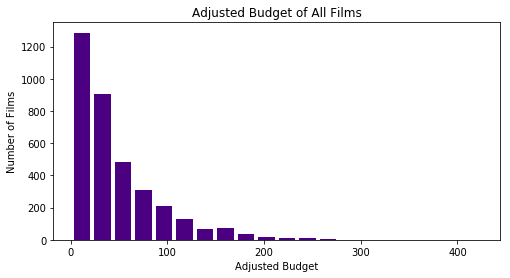

In [23]:
plt.figure(figsize=(8,4))
plt.hist(df['budget_adj'], color='indigo', rwidth=.8, bins=20)
plt.xlabel('Adjusted Budget')
plt.ylabel('Number of Films')
plt.title('Adjusted Budget of All Films')
plt.show()

>This histogram of adjusted budget is very skewed to the right. It appears that a majority of films have a budget of less than 100 million.

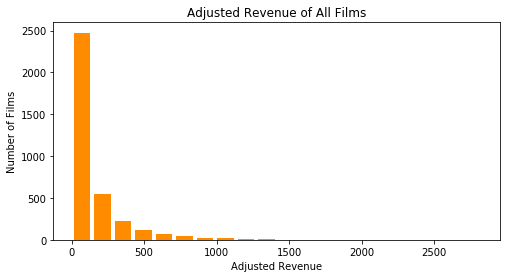

In [24]:
plt.figure(figsize=(8,4))
plt.hist(df['revenue_adj'], color='darkorange', rwidth=.8, bins=20)
plt.xlabel('Adjusted Revenue')
plt.ylabel('Number of Films')
plt.title('Adjusted Revenue of All Films')
plt.show()

>This histogram of adjusted revenue is also very skewed to the right. A vast majority of the films (around 3000) have an adjusted revenue of 250 million or less.

In [25]:
bud_m = df.revenue_adj.mean()
bud_m

147.7985347985348

In [26]:
bud_less = df.budget_adj < bud_m
bud_more = df.budget_adj >= bud_m

>We've broken down those films that cost more and less than the total average adjusted budget.

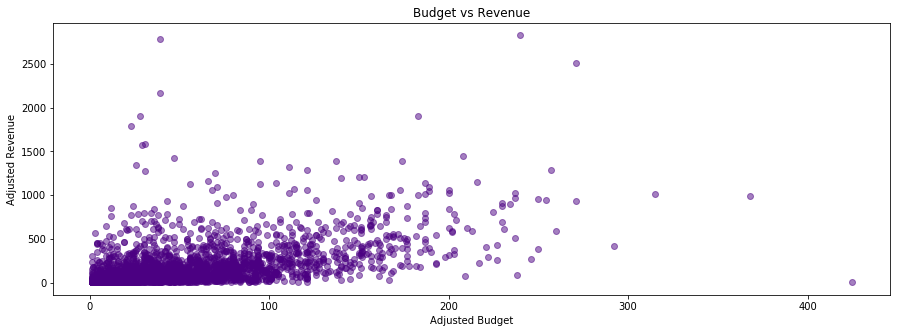

In [27]:
plt.figure(figsize=(15,5))
plt.scatter(df.budget_adj, df.revenue_adj, color='indigo', alpha=.5)
plt.title('Budget vs Revenue')
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue');

### Results

In this scatterplot, we're looking to see if there's a correlation between the budget and revenue. Do films with higher budgets appear to earn more revenue? From what we can see here, there doesn't appear to be a strong correlation between these two variables. Let's take a closer look in the next chart.

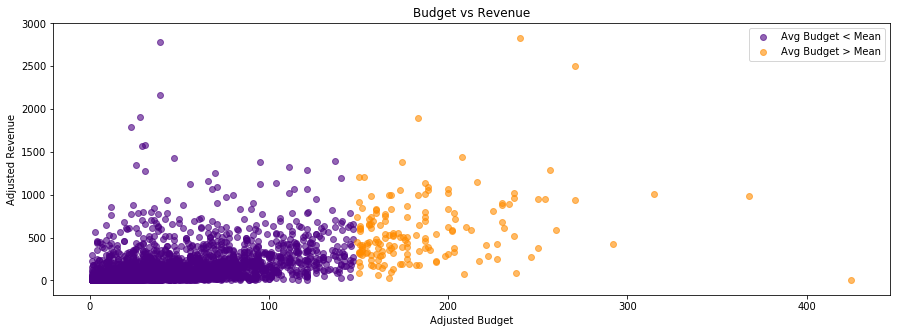

In [28]:
plt.figure(figsize=(15,5))
plt.scatter(df.budget_adj[bud_less], df.revenue_adj[bud_less], color='indigo', alpha=.6)
plt.scatter(df.budget_adj[bud_more], df.revenue_adj[bud_more], color='darkorange', alpha=.6)
plt.legend(['Avg Budget < Mean', 'Avg Budget > Mean'])
plt.title('Budget vs Revenue')
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue');

### Results (continued)

Here, those films with budgets under and over the mean have been separated by color. While there are far fewer films with budgets over the mean, we can see that those that did cost more money to produce didn't necessarily earn more in revenue.

## Question 2:

### Is there a correlation between runtime and voter score?

How long do audiences like to sit in a movie? Do their votes indicate whether they prefer shorter or longer movies? Again, let's take a look at each individual variable using histograms to get started.

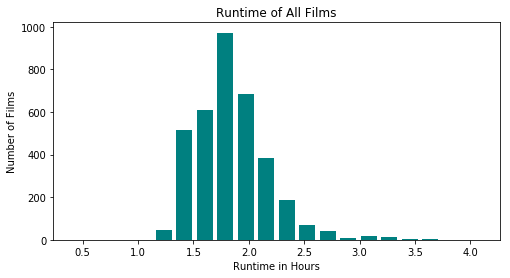

In [29]:
plt.figure(figsize=(8,4))
plt.hist(df['runtime'], color='teal', rwidth=.8, bins=20)
plt.xlabel('Runtime in Hours')
plt.ylabel('Number of Films')
plt.title('Runtime of All Films')
plt.show()

>While a bit scewed to the right, it appears that most films have a runtime falling between 1.5 and 2.5 hours, with a bit of a sweet spot in between 1.5 and 2 hours.

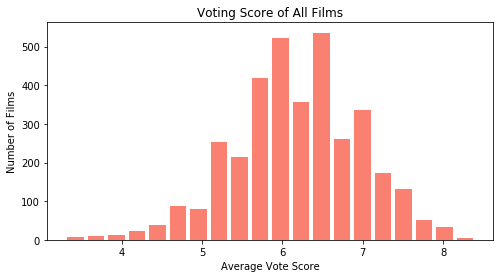

In [30]:
plt.figure(figsize=(8,4))
plt.hist(df['vote_average'], color='salmon', rwidth=.8, bins=20)
plt.xlabel('Average Vote Score')
plt.ylabel('Number of Films')
plt.title('Voting Score of All Films')
plt.show()

In [31]:
df.runtime.describe()

count    3549.000000
mean        1.835080
std         0.327886
min         0.400000
25%         1.600000
50%         1.800000
75%         2.000000
max         4.100000
Name: runtime, dtype: float64

>We're going to use these percentiles in order to group the films into categories based on runtime.

In [32]:
bin_edges = [0.4, 1.6, 1.8, 2.0, 4.1]
bin_names = ['short', 'medium', 'long', 'extra long']

In [33]:
df['length'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

df.head()

,title,runtime,vote_average,budget_adj,revenue_adj,length
0,Jurassic World,2.1,6.5,137,1392,extra long
1,Mad Max: Fury Road,2.0,7.1,137,348,long
2,Insurgent,2.0,6.3,101,271,long
3,Star Wars: The Force Awakens,2.3,7.5,183,1902,extra long
4,Furious 7,2.3,7.3,174,1385,extra long


>A new column named Length has been added that puts each film into a respective category based on runtime.

In [34]:
length_avg = df.groupby('length').mean()['vote_average']
length_avg

length
short         5.876300
medium        6.083539
long          6.370278
extra long    6.662500
Name: vote_average, dtype: float64

>We're going to use these average vote scores based on each length category in order to plot the data.

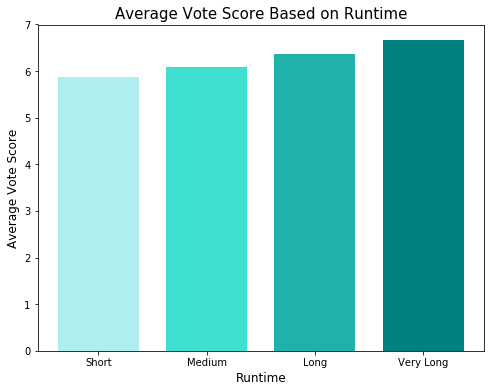

In [35]:
locations = [1, 2, 3, 4]
heights = length_avg
labels = ['Short', 'Medium', 'Long', 'Very Long']

plt.figure(figsize=(8,6))
plt.bar(locations, heights, tick_label=labels, color=['paleturquoise', 'turquoise', 'lightseagreen', 'teal'], width=.75)
plt.title('Average Vote Score Based on Runtime', size=15)
plt.xlabel('Runtime', size=12)
plt.ylabel('Average Vote Score', size=12)
plt.show();

### Results

Interesting. There is a steady upwards trend showing that the longer the film, the higher the averate vote score. From the earlier histogram of all runtimes, we noted that peak runtime was between 1.5 and 2 hours. However, in this case it appears audiences favored longer films when it came to voting.

<a id='conclusions'></a>
## Conclusions

Let's begin by looking at our original questions:

#### 1. Is there a correlation between budget and revenue?

While the average movie budget (adjusted for inflation) is around 148 million, the vast majority of films are produced for less than 100 million. And then there are some films that cost several-hundred million to produce. With that being said, there does not appear to be a strong correlation between budget and revenue earned. It's possible that the amount spent on a particular movie is not solely determined by expected revenue, but could potentially be impacted by conditions or factors not provided in this dataset. While one can assume that film producers hope to earn as much revenue as possible, it appears that spending more on the film itself will not necessarily produce equivalent returns in revenue.

#### 2. Is there a correlation between runtime and voter score?

We noted earlier that the most frequent film length falls between 1.5 and 2 hours. But while that may be, audiences appear to prefer films with long runtimes. When looking at the chart, the longer the film, the higher the voter rating. Perhaps this is impacted by the perceived value of a movie ticket, or maybe it is impacted by other factors completely that were not provided in this dataset. At any rate, from the data that we do have, we can se that audiences appear to want their movies to never end!

### A Notice Regarding Limitations

>Please note that the accuracy of the originally provided data is dependent on that of the provider, The Movie Database. While the data has been cleaned to the best of my ability, accuracy of the provided data cannot be 100% gauranteed. Also, any findings in this dataset do not imply causation in the event that a correlation does exist. This dataset does not represent all movies ever made but rather is a sample of movies and related data provided by The Movie Database.

##### No external sources were used in this project (aside from lesson content provided by Udacity).